In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('BX-Books.csv',encoding='latin-1')
books.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [3]:
users = pd.read_csv('BX-Users.csv', encoding='latin-1')
users.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
ratings = pd.read_csv('BX-Book-Ratings.csv', encoding='latin-1')
ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [5]:
books.shape,users.shape,ratings.shape

((271379, 5), (278859, 3), (1048575, 3))

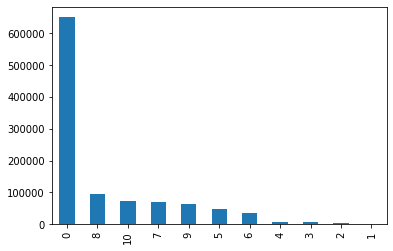

In [6]:
ratings.rating.value_counts().plot(kind='bar');

Majority class belongs to zero

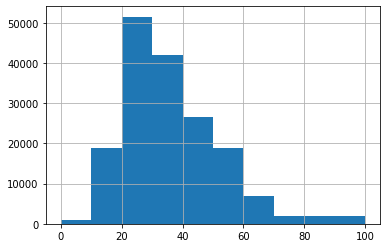

In [7]:
users.Age.hist(bins=[0,10,20,30,40,50,60,70,100]).plot(kind='bar');

Most users are between 20-30

In [8]:
ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [9]:
# I want to know what number of ratings did each book receive
rating_count = pd.DataFrame(ratings.groupby('isbn')['rating'].count())

In [10]:
rating_count = rating_count.sort_values('rating', ascending=False)
rating_count

,rating
isbn,
971880107,2264
316666343,1164
385504209,813
312195516,668
60928336,662
...,...
3815820782,1
3815860032,1
3815860121,1


In [11]:
books_rating_merged = pd.merge(rating_count,books,on='isbn')
books_rating_merged.head()

,isbn,rating,book_title,book_author,year_of_publication,publisher
0,971880107,2264,Wild Animus,Rich Shapero,2004,Too Far
1,316666343,1164,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2,385504209,813,The Da Vinci Code,Dan Brown,2003,Doubleday
3,312195516,668,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
4,60928336,662,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


In [12]:
#I want to know the average ratings of maximum rated books
ratings_mean = pd.DataFrame(ratings.groupby('isbn')['rating'].mean())
ratings_mean['rating_count'] = pd.DataFrame(ratings.groupby('isbn')['rating'].count())
ratings_mean.sort_values('rating_count', ascending = False).head()

,rating,rating_count
isbn,,
971880107,1.032244,2264
316666343,4.457045,1164
385504209,4.691267,813
312195516,4.326347,668
60928336,3.462236,662


We will remove users with less than 200 ratings

We will also remove books with less than 100 ratings

In [13]:
#select ratings of users who have rated more than 200 ratings

counts_user = ratings['user_id'].value_counts()
ratings = ratings[ratings['user_id'].isin(counts_user[counts_user >= 200].index)]

In [14]:
counts_books = ratings['rating'].value_counts()
ratings = ratings[ratings['rating'].isin(counts_books[counts_books >= 100].index)]
# counts_books = counts_books[counts_books >= 100]

In [15]:
ratings

,user_id,isbn,rating
1456,277427,002542730X,10
1457,277427,26217457,0
1458,277427,003008685X,8
1459,277427,30615321,0
1460,277427,60002050,0
...,...,...,...
1048570,250764,451410777,0
1048571,250764,452264464,8
1048572,250764,048623715X,0
1048573,250764,486256588,0


In [16]:
ratings = ratings.drop_duplicates()

In [17]:
ratings_pivot = ratings.reset_index().pivot_table(index='user_id',columns='isbn').rating

In [18]:
ratings_pivot.fillna(0,inplace=True)
ratings_pivot

isbn,904492401X,*0515128325,0,0 00 612183 7,0 00 614494 2,0 7336 1053 6,0 907 062 008,0.330241664,000104687X,000104799X,...,THEFLYINGACE,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107
user_id,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Recommendation
ratings_pivot[ratings_pivot.index == 254]

isbn,904492401X,*0515128325,0,0 00 612183 7,0 00 614494 2,0 7336 1053 6,0 907 062 008,0.330241664,000104687X,000104799X,...,THEFLYINGACE,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107
user_id,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
##User - User BAsed collaborative filtering

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
import operator
def similar_users(user_id, matrix, k=5):
    
    # create a df of just the current user
    user = matrix[matrix.index == user_id]
    
    # and a df of all other users
    other_users = matrix[matrix.index != user_id]
    
    # calc cosine similarity between user and each other user
    similarities = cosine_similarity(user,other_users)[0].tolist()
    
    # create list of indices of these users
    indices = other_users.index.tolist()
    
    # create key/values pairs of user index and their similarity
    index_similarity = dict(zip(indices, similarities))
#     print(index_similarity)
    
    # sort by similarity
    index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1))
    index_similarity_sorted.reverse()
#     print(index_similarity_sorted)
    
    # grab k users off the top
    top_users_similarities = index_similarity_sorted[:k]
    users = [u[0] for u in top_users_similarities]
    
    return users
    

In [22]:
similar_user_indices = similar_users(277478, ratings_pivot,10)
print(similar_user_indices)

[141819, 12538, 42914, 102647, 80538, 239594, 76352, 81492, 44595, 203799]


In [23]:
def recommend_item(user_index, similar_user_indices, matrix, items=3):
    
    # load vectors for similar users
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
    # calc avg ratings across the 3 similar users
    similar_users = similar_users.mean(axis=0)
    # convert to dataframe so its easy to sort and filter
    similar_users_df = pd.DataFrame(similar_users, columns=['mean'])
    
    
    # load vector for the current user
    user_df = matrix[matrix.index == user_index]
    # transpose it so its easier to filter
    user_df_transposed = user_df.transpose()
    # rename the column as 'rating'
    user_df_transposed.rename(columns = {user_index: 'rating'}, inplace = True)
    # remove any rows without a 0 value. Books not read yet
    user_df_transposed = user_df_transposed[user_df_transposed['rating']==0]
    # generate a list of Books the user has not read
    books_unseen = user_df_transposed.index.tolist()
    
    # filter avg ratings of similar users for only Books the current user has not read
    similar_users_df_filtered = similar_users_df[similar_users_df.index.isin(books_unseen)]
    # order the dataframe
    similar_users_df_ordered = similar_users_df.sort_values(by=['mean'], ascending=False)
    # grab the top n books   
    top_n_books = similar_users_df_ordered.head(items)
    top_n_books_indices = top_n_books.index.tolist()
    # lookup these books in the other dataframe to find names
    book_information = books_rating_merged[books_rating_merged['isbn'].isin(top_n_books_indices)]
    
    return book_information #items
# try it out
recommend_item(277478, similar_user_indices, ratings_pivot)

,isbn,rating,book_title,book_author,year_of_publication,publisher
488,055321313X,117,Anne of Green Gables (Anne of Green Gables Nov...,L.M. MONTGOMERY,1982,Bantam Classics
736,1558745718,90,Chicken Soup for the Pet Lover's Soul (Chicken...,Jack Canfield,1998,Health Communications
2765,312113420,37,James Herriot's Cat Stories,James Herriot,1994,St. Martin's Press
